# Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from scipy import stats
import re as re

# Import raw data

In [2]:
raw_data=pd.read_csv('titanic_train.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Get a first class at data 

In [3]:
raw_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Describe data

In [4]:
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Check correlation between numeric variables

In [5]:
raw_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


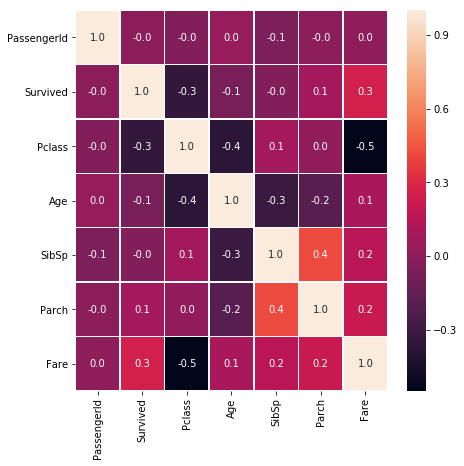

In [6]:
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(raw_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Findings: 

1) Survival is negatively correlated with class. People in class 2 and 3 were less likely to survive than that in class 1. 
2) Survival is positively correlated with fare - the higher the price for the ticket, the higher the chances of survival. That is in line with finding #1
3) There is slight negative correlation between age and survival - odler people were less likely to survive.
4) Survival is slightly correlated with # of parent/children aboard - that is families were slightly more likely to survive

In [7]:
#Checkpoint #1, copy data for further use
data1=raw_data.copy()

#create filters for survived/not survived

filter_survived = data1.Survived == 1
filter_died = data1.Survived == 0

# Hypothesis #1: Women had a higher chance of survival

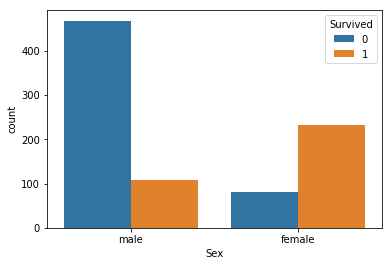

In [8]:
ax = sns.countplot(x='Sex', hue='Survived', data=data1)

Hypothesis #1: True, women were more likely to survive. Let us now quantify number of men/women survived.

In [9]:
data1.groupby(['Survived', 'Sex'])['PassengerId'].agg('count')

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

In [10]:
#as women were more likely to survive, it is worth creating separatting data into male/female to investigate further.

data_male=data1[(data1['Sex']=='male')]
data_female=data1[(data1['Sex']=='female')]

In [11]:
men_survived_share = data_male[filter_survived].PassengerId.count()/data_male.PassengerId.count()
women_survived_share = data_female[filter_survived].PassengerId.count()/data_female.PassengerId.count()

print("Share of men survived (%) :", men_survived_share.round(3)*100)
print("Share of women survived (%) :", women_survived_share.round(3)*100)

Share of men survived (%) : 18.9
Share of women survived (%) : 74.2


C:\Users\v.butorin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\v.butorin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


# Hypothesis #2: Age affects survival

Text(0,0.5,'Distribution')

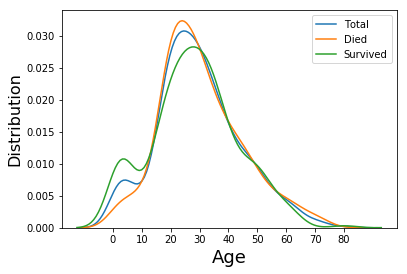

In [12]:
#Let's see average age of passengers and compare it to those who survived

a=age_dist=sns.kdeplot(data1.Age.dropna(), label='Total')
b=age_dist=sns.kdeplot(data1[filter_died].Age.dropna(), label='Died')
c=age_dist=sns.kdeplot(data1[filter_survived].Age.dropna(), label='Survived')


#x.legend_.set_title('sdf')

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.xlabel('Age', fontsize=18)
plt.ylabel('Distribution', fontsize=16)

Observation: 1) Up to ~15 years passengers (children) were more likely to survive. 2) Between 20 and 40 years you were more likely to die. However, it is likely due to majority of men aboard - we will check that in the next step. 3) Between 35 and 60 there were 50%-50% of survival/death 4) After 60 you were more likely to die than to survive.

# Hypothesis # 2.1: Passengers aged 20-40, 60+ were more likely to die because there were more men than women in that age groups

We have already figured out that women were 

Text(0,0.5,'Distribution')

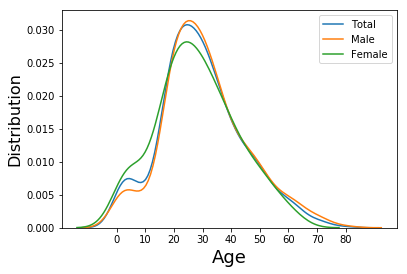

In [13]:
#Let's see average age of passengers and compare it to those who survived


a=age_dist=sns.kdeplot(data1.Age.dropna(), label='Total')
b=age_dist=sns.kdeplot(data_male.Age.dropna(), label='Male')
c=age_dist=sns.kdeplot(data_female.Age.dropna(), label='Female')


#x.legend_.set_title('sdf')

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.xlabel('Age', fontsize=18)
plt.ylabel('Distribution', fontsize=16)

Indeed, we see that share of males in age groups 20-40 and 60+ was higher than that of women and that along with higher total number of men aboard explains lower chance of survival in those two age groups.

C:\Users\v.butorin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\v.butorin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0,0.5,'Distribution')

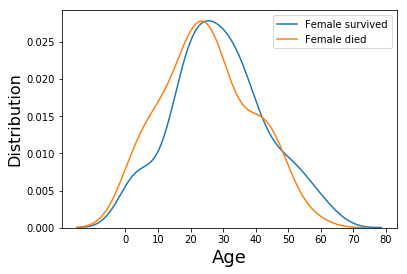

In [14]:
a=age_dist=sns.kdeplot(data_female[filter_survived].Age.dropna(), label='Female survived')
b=age_dist=sns.kdeplot(data_female[filter_died].Age.dropna(), label='Female died')


#x.legend_.set_title('sdf')

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.xlabel('Age', fontsize=18)
plt.ylabel('Distribution', fontsize=16)

We observe that women were more likely to die in age groups 0-20. That is quite surprising as children, as later observed had a much higher chance of survival. At the same time, women were more likely to survive at age 20+ except for a small deviation aroung age 45-50, which we will neglect. 

C:\Users\v.butorin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\v.butorin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0,0.5,'Distribution')

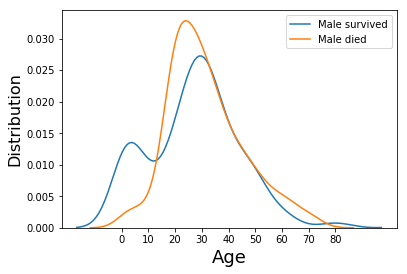

In [15]:
a=age_dist=sns.kdeplot(data_male[filter_survived].Age.dropna(), label='Male survived')
b=age_dist=sns.kdeplot(data_male[filter_died].Age.dropna(), label='Male died')


#x.legend_.set_title('sdf')

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.xlabel('Age', fontsize=18)
plt.ylabel('Distribution', fontsize=16)

In [16]:
avg_age_survived=data1.Age[filter_survived].mean()
avg_age_died=data1.Age[filter_died].mean()

print("Average age of survived passengers: ", avg_age_survived)
print("Average age of died passengers: ", avg_age_died)

Average age of survived passengers:  28.343689655172415
Average age of died passengers:  30.62617924528302


Initially it appeared that age affected survival rate. 

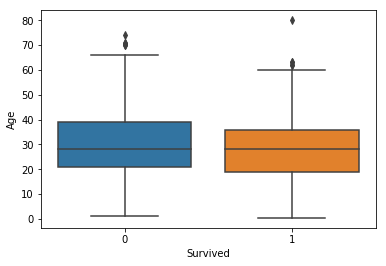

In [17]:
ax = sns.boxplot(x="Survived", y="Age", data=data1)

Mean age of survived/non-survived is almost the same: around 30 years. Yet. survived people were generally younger than those who died. Let us now check men/female age of survived/non-survived.

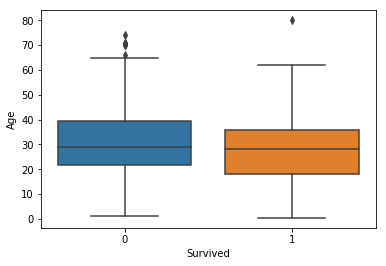

In [18]:
ax = sns.boxplot(x="Survived", y="Age", data=data_male)

Among men data is similar to that of the general dataset

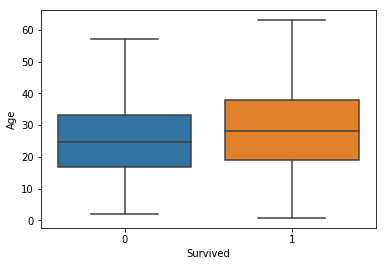

In [19]:
ax = sns.boxplot(x="Survived", y="Age", data=data_female)

Women, on the other hand, had slightly higher chances of survival if they were older

Overall most people survived were between 20 and 40 years old. But that does not tell us anything because most passengers were also aged 20-40.

# Hypothesis #3: Children had a higher chance of survival

In [20]:
#create filters to separate children and adults

filter_child = data1.Age<=15
filter_adult = data1.Age>15

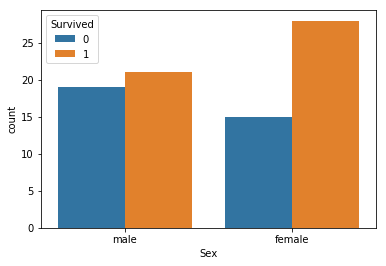

In [21]:
ax = sns.countplot(x = 'Sex', hue='Survived', data=data1[filter_child])

Surprisingly, female children were less likely to survive (~66% vs 74% for total females), whereas for male children chances of survival were >50% compared to only 19% for total males.

Let us now investigate other age groups

In [22]:
filter_age_15_40 = data1.Age.between(15, 40, inclusive=False)
filter_age_40_60 = data1.Age.between(40, 60, inclusive=False)
filter_age_60_80 = data1.Age.between(60, 80, inclusive=False)

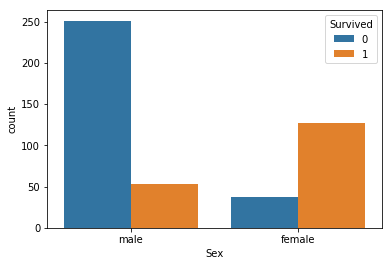

In [23]:
ax = sns.countplot(x = 'Sex', hue='Survived', data=data1[filter_age_15_40])

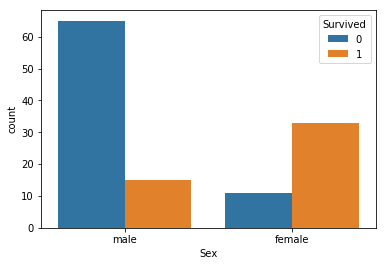

In [24]:
ax = sns.countplot(x = 'Sex', hue='Survived', data=data1[filter_age_40_60])

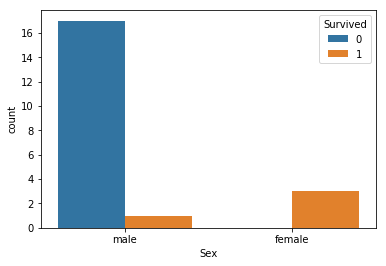

In [25]:
ax = sns.countplot(x = 'Sex', hue='Survived', data=data1[filter_age_60_80])

Survival rate among passengers aged 15-40 and 40-60 is generally in line with total sample. However, that of 60+ is close to zero. Therefore we will split passengers in three age groups: 0-15, 15-60 and 60+.

In [26]:
#create a second checkpoint
data2=data1.copy()

Before splitting passengers intho three age groups we need to decide what do with NaN age values. Let us investigate how rate of survived passengers with NaN age compares to those with provided age.

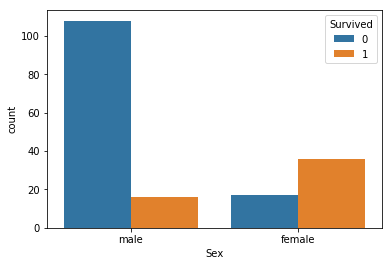

In [27]:
#select passengers with NaN age
ax = sns.countplot(x = 'Sex', hue='Survived', data=data2[data2.Age.isnull()])

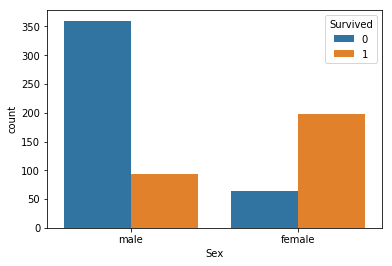

In [28]:
#select passengers with given age
ax = sns.countplot(x='Sex', hue='Survived', data=data2.dropna(subset=['Age']))

We see that passengers with NaN age had a lower chance of survival than the general sample. It is lower for both and women. Therefore, in addition to 3 age groups 0-15, 15-60 and 60+ we will add NaN category.

In [29]:
#make a third checkpoint
data3=data2.copy()

In [30]:
#add four age groups: NaN, 0-15, 15-60, 60+
data3['Age NaN'] = np.where(data3['Age'].isnull(), 1, 0)
data3['Age 0-15'] = np.where(data3.Age<=15, 1, 0)
data3['Age 15-60'] = np.where((data3.Age>15) & (data3.Age<=60), 1, 0)
data3['Age 60+'] = np.where(data3.Age>60, 1, 0)

# Hypothesis 4: Cabin location affected survival chances (some decks had more safeboats than others)

In [31]:
#get the first letter of Cabin to get the deck

data3['Deck'] = data3['Cabin'].astype(str).str[0]

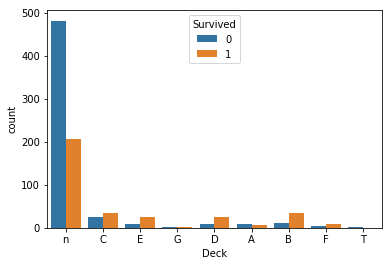

In [32]:
ax = sns.countplot(x = 'Deck', hue='Survived', data=data3)

That analysis did not give us much as most entries do not have cabin number. Yet we observe that passengers, whose cabin number is available, had a much higher chance of survival than those without it. 

In [33]:
#check number of passengers in each deck
data3.Deck.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64

In [34]:
#apply one hot encoding to decks
data3 = pd.get_dummies(data3, columns=['Deck'], prefix = ['Deck'])

In [35]:
#create checkpoint
data4=data3.copy()

# Hypothesis 5: Title affected survival rate

In [36]:
#extract title from name
def get_title(dataset, feature_name):
    return dataset[feature_name].map(lambda name:name.split(',')[1].split('.')[0].strip())

data4['Title'] = get_title(data4, 'Name')

In [37]:
data4.groupby(['Title'])['PassengerId'].size().sort_values(ascending=False)

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Jonkheer          1
Don               1
the Countess      1
Lady              1
Sir               1
Mme               1
Ms                1
Capt              1
Name: PassengerId, dtype: int64

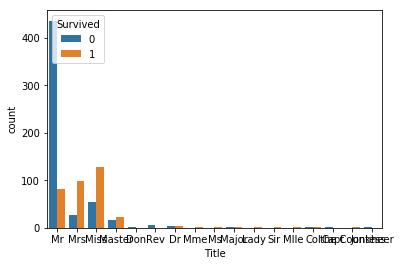

In [38]:
#check distribution of survived passengers by title
ax = sns.countplot(x = 'Title', hue='Survived', data=data4)

We see one interesting thing - Masters were more likely to srvive than die. In English Master is a title of a young man. As we have already found out, children were more likely to survive than die.

In [39]:
#check average age of Master
data4[data4.Title=='Master'].Age.mean()

4.574166666666667

There it is, Masters were small children. Let us check average age of other titles. 

In [40]:
data4.groupby('Title', as_index=False)['Age'].mean()

,Title,Age
0,Capt,70.000000
1,Col,58.000000
2,Don,40.000000
3,Dr,42.000000
4,Jonkheer,38.000000
5,Lady,48.000000
6,Major,48.500000
7,Master,4.574167
8,Miss,21.773973
9,Mlle,24.000000


Given information above, we can actually update NaN values in the Age column. 

In [41]:
#updating NaN age values
data4["Age"] = data4.groupby("Title")["Age"].transform(lambda x: x.fillna(x.mean()))

#updating age groups columns

data4['Age 0-15'] = np.where(data4.Age<=15, 1, 0)
data4['Age 15-60'] = np.where((data4.Age>15) & (data3.Age<=60), 1, 0)
data4['Age 60+'] = np.where(data4.Age>60, 1, 0)

In [42]:
#check if we have any missed NaN age values now
data4.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age NaN          0
Age 0-15         0
Age 15-60        0
Age 60+          0
Deck_A           0
Deck_B           0
Deck_C           0
Deck_D           0
Deck_E           0
Deck_F           0
Deck_G           0
Deck_T           0
Deck_n           0
Title            0
dtype: int64

Great. We have replaced NaN age values with average of their respective title. Now we can group title into sevral groups. 

In [43]:
#grouping titles into honored, mr, miss, mrs, master
data4['Title']=data4['Title'].map({'Col':'Honored','Don':'Honored', 'Dr':'Honored', 'Johnkheer':'Honored', 'Lady':'Honored', 'Major':'Honored', 'Rev':'Honored', 'Sir':'Honored',
                                  'Master': 'Master',
                                   'Miss': 'Miss', 'Mlle': 'Miss', 'Mme': 'Miss', 'Ms': 'Miss',
                                  'Mrs': 'Mrs',
                                  'Mr': 'Mr',})

In [44]:
#apply one hot encoding to tiles
data4 = pd.get_dummies(data4, columns=['Title'], prefix = ['Title'])

In [45]:
#drop NaN age group, drop Age

data4=data4.drop(['Age NaN'], axis=1)
data4=data4.drop(['Age'], axis=1)

In [46]:
#create checkpoint
data5=data4.copy()

In [47]:
#drop name, ticket, cabin columns
data5=data5.drop(['Name'], axis=1)
data5=data5.drop(['Ticket'], axis=1)
data5=data5.drop(['Cabin'], axis=1)

In [48]:
data5.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age 0-15,Age 15-60,...,Deck_E,Deck_F,Deck_G,Deck_T,Deck_n,Title_Honored,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,1,0,3,male,1,0,7.2500,S,0,1,...,0,0,0,0,1,0,0,0,1,0
1,2,1,1,female,1,0,71.2833,C,0,1,...,0,0,0,0,0,0,0,0,0,1
2,3,1,3,female,0,0,7.9250,S,0,1,...,0,0,0,0,1,0,0,1,0,0
3,4,1,1,female,1,0,53.1000,S,0,1,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,male,0,0,8.0500,S,0,1,...,0,0,0,0,1,0,0,0,1,0


# Hypothesis 6: Size of family affected survival rate

Let us check, how number of siblings/spouses and parents/children affected survival rate

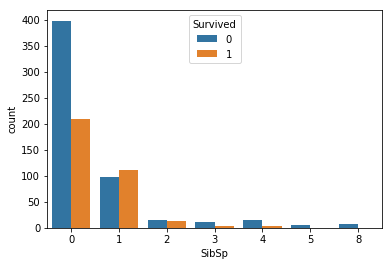

In [49]:
#comparing survival rate based on number of siblings/spouses aboard
ax = sns.countplot(x = 'SibSp', hue='Survived', data=data5)

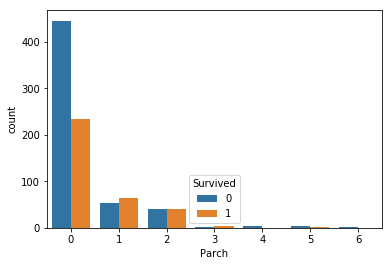

In [50]:
#comparing survival rate based on number of parents/children aboard
ax = sns.countplot(x = 'Parch', hue='Survived', data=data5)

We clearly see that passengers travelling alone had a much lower chance of survival than those travelling with their relatives. Let us now add Passenger SibSp to Parch and create a new column with size of the family.

In [51]:
#adding passenger to number of parents/children to number of siblings/spouses
data5['Family size'] =  1+ data5['Parch'] + data5['SibSp']

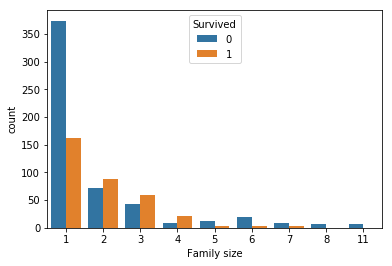

In [52]:
#comparing survival rate based on size of the family
ax = sns.countplot(x = 'Family size', hue='Survived', data=data5)

We observe two patterns here. 1 - passengers travelling alone had a much lower survival chance than those with 1-3 relatives aboard. 2 - passengers with 4+ relatives aboard had a much lower survival chance than those with 1-2. First idea that comes to mind is that most big families were travelling in third class, whose passengers were least likely to survive.

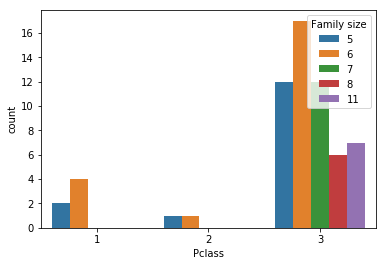

In [53]:
#check assumption that most big families were travelling in 3 class.
ax = sns.countplot(x = 'Pclass', hue='Family size', data=data5[data5['Family size']>4])

Indeed, an overwhelming majority of big families were travelling in third class.

In [54]:
#create checkpoint before adding and deleting new columns
data6=data5.copy()

Let us now divide passengers into three categories: 1) travelling alone 2) travelling with 1-3 relatives 3) travelling with 4+ relatives.

In [55]:
#assign passengers to three categories of family size
data6['Family size 1'] = np.where(data6['Family size']==1, 1, 0)
data6['Family size 2-4'] = np.where((data6['Family size']>1) & (data6['Family size']<=4), 1, 0)
data6['Family size 5+'] = np.where(data6['Family size']>4, 1, 0)

# Hypothesis 7: Port of embarkment does not affect survival rate

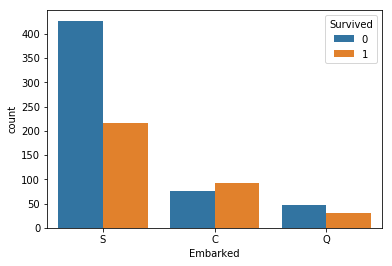

In [56]:
#check if different ports of embarkment had difference share of survived passengers
ax = sns.countplot(x = 'Embarked', hue='Survived', data=data6)

Seems strange that different ports had different share of survivors. Let us investigate for anomlies (e.g. different share of women/children/passengers in first class)

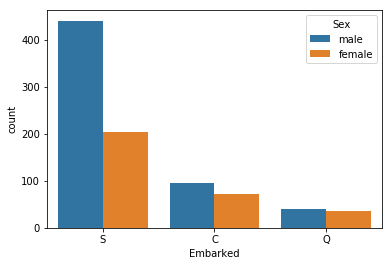

In [57]:
#check if there were more women that men in different ports
ax = sns.countplot(x = 'Embarked', hue='Sex', data=data6)

Finding 1: share of females embarked in each port is different and that can affect survival rate. Initially it appears that port of embarkment does not play a role, as survival rate is very similar to share of women, who were more likely to survive. Let us dig deeper and compare share of women survived embarked in each port.

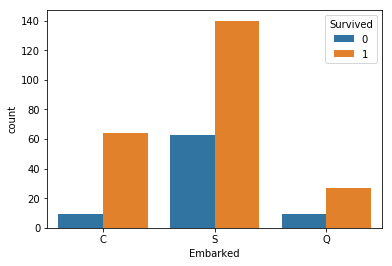

In [58]:
#check share of survived women in each port
ax = sns.countplot(x = 'Embarked', hue='Survived', data=data6[data6['Sex']=='female'])

We see that most women, who died, boarded in port S. There must be some reason for that. We have prevously found out that passenger class, age and family size could affect survival rate. Let us check class, age and family size in those three ports.

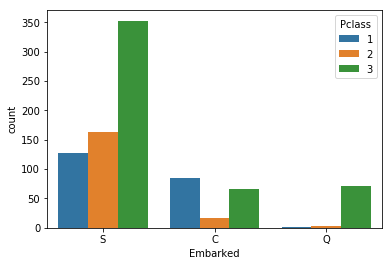

In [59]:
#check count of passengers in each class embarked in each port
ax = sns.countplot(x = 'Embarked', hue='Pclass', data=data6)

Finding 2: most passengers in port S were those from 3 class, which can partially explain, why there were fewer survivors. Yet, the same is true for port Q, however, passengers embarked there had a higher chance of survival. 

We have also found out, that big families were less likly to survive. Probably most big families embarked in port S.

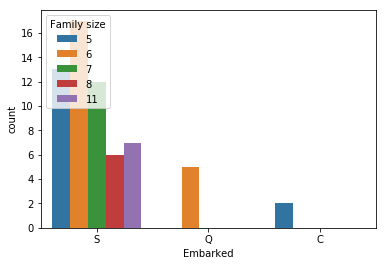

In [60]:
#check number of passengers in big families embarked in each port
ax = sns.countplot(x = 'Embarked', hue='Family size', data=data6[data6['Family size']>4])

Finding 3: absolute majority of big families (less likely to survive) embarked in port S.

Conclusion: it seems that different survival rate of passengers embarked in different ports is explained by a combination of factors including share of passengers in big families, passenger class and other gender. Different ports are highly unlikely to directly affect survival rate. Yet, we will leave them in our analysis as none of other variables appears to fully explain the trend.

In [61]:
#create checkpoint
data7=data6.copy()

In [62]:
#apply one-hot encoding for each port
data7 = pd.get_dummies(data7, columns=['Embarked'], prefix = ['Embarked'])

# Hypothesis 8: Fare affected survival rate

Text(0,0.5,'Distribution')

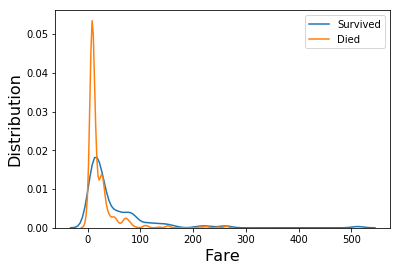

In [63]:
#Let us check distribution of fare of survived/died passengers
a=sns.kdeplot(data7[filter_survived].Fare.dropna(), label='Survived')
b=sns.kdeplot(data7[filter_died].Fare.dropna(), label='Died')

plt.xlabel('Fare', fontsize=16)
plt.ylabel('Distribution', fontsize=16)

We see that most passengers paid between USD 0 and USD 100. Let's have a closer look at the distribution but limit fare to USD 100.

Text(0,0.5,'Distribution')

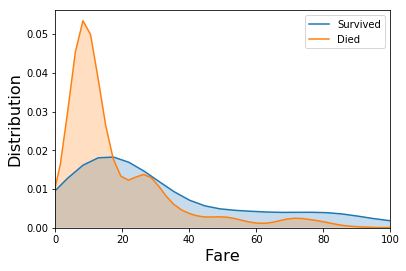

In [64]:
a=sns.kdeplot(data7[filter_survived].Fare.dropna(), label='Survived', shade='true').set(xlim=(0, 100))
b=sns.kdeplot(data7[filter_died].Fare.dropna(), label='Died', shade='true').set(xlim=(0, 100))

plt.xlabel('Fare', fontsize=16)
plt.ylabel('Distribution', fontsize=16)

In [65]:
#see what passengers who died paid
data7[filter_died].Fare.describe()

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

In [66]:
#see what survived passengers paid
data7[filter_survived].Fare.describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

From the data observed above we two important insights: 1) Fare price did indeed affect survival rate. If you paid more than 10 dollars, your chances of survival went up. 2) 75% of passengers who died, paid less than USD 26, whereas only 50% of passengers survived paid less or equal thn that. From that observation let us divide passengers into three ticket fare groups: <10.5, 10.5-26, 26+

In [67]:
data7['Fare $0-10'] = np.where((data7['Fare']>=0) & (data7['Fare']<=10.5), 1, 0)
data7['Fare $10-26'] = np.where((data7['Fare']>10.5) & (data7['Fare']<=26), 1, 0)
data7['Fare $26+'] = np.where((data7['Fare']>26), 1, 0)

In [68]:
#drop Fare, ParCh, SibSp, Family size 
data7=data7.drop(['Fare'], axis=1)
data7=data7.drop(['Parch'], axis=1)
data7=data7.drop(['SibSp'], axis=1)
data7=data7.drop(['Family size'], axis=1)

In [69]:
#create final checkpoint
data8=data7.copy()

# Final preprocessing steps - change sex to binary, apply one-hot to Pclass

In [70]:
#changing sex to binary
data8['Sex']=data8['Sex'].map({'male':0, 'female':1})

#applying one-hot to Pclass
data8 = pd.get_dummies(data8, columns=['Pclass'], prefix = ['Pclass'])

In [71]:
#final glance at the data
data8.head()

,PassengerId,Survived,Sex,Age 0-15,Age 15-60,Age 60+,Deck_A,Deck_B,Deck_C,Deck_D,...,Family size 5+,Embarked_C,Embarked_Q,Embarked_S,Fare $0-10,Fare $10-26,Fare $26+,Pclass_1,Pclass_2,Pclass_3
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1,2,1,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0
2,3,1,1,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,4,1,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,1,0,0
4,5,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [72]:
#saving processed train data
titanic_train_data_processed=data8
titanic_train_data_processed.to_csv("titanic_train_data_processed.csv", index=False)

# Bringing test file to train format

In [73]:
test_data=pd.read_csv('titanic_test.csv')

In [74]:
#add four age groups: NaN, 0-15, 15-60, 60+
test_data['Age NaN'] = np.where(test_data['Age'].isnull(), 1, 0)
test_data['Age 0-15'] = np.where(test_data.Age<=15, 1, 0)
test_data['Age 15-60'] = np.where((test_data.Age>15) & (test_data.Age<=60), 1, 0)
test_data['Age 60+'] = np.where(test_data.Age>60, 1, 0)

#get the first letter of Cabin to get the deck
test_data['Deck'] = test_data['Cabin'].astype(str).str[0]

#apply one hot encoding to decks
test_data = pd.get_dummies(test_data, columns=['Deck'], prefix = ['Deck'])

#extract title from name
test_data['Title'] = get_title(test_data, 'Name')

#updating NaN age values
test_data["Age"] = test_data.groupby("Title")["Age"].transform(lambda x: x.fillna(x.mean()))

#updating age groups columns
test_data['Age 0-15'] = np.where(test_data.Age<=15, 1, 0)
test_data['Age 15-60'] = np.where((test_data.Age>15) & (test_data.Age<=60), 1, 0)
test_data['Age 60+'] = np.where(test_data.Age>60, 1, 0)

#grouping titles into honored, mr, miss, mrs, master
test_data['Title']=test_data['Title'].map({'Col':'Honored','Don':'Honored', 'Dr':'Honored', 'Johnkheer':'Honored', 'Lady':'Honored', 'Major':'Honored', 'Rev':'Honored', 'Sir':'Honored',
                                  'Master': 'Master',
                                   'Miss': 'Miss', 'Mlle': 'Miss', 'Mme': 'Miss', 'Ms': 'Miss',
                                  'Mrs': 'Mrs',
                                  'Mr': 'Mr',})

#apply one hot encoding to tiles
test_data = pd.get_dummies(test_data, columns=['Title'], prefix = ['Title'])

#drop columns
test_data=test_data.drop(['Age NaN'], axis=1)
test_data=test_data.drop(['Age'], axis=1)
test_data=test_data.drop(['Name'], axis=1)
test_data=test_data.drop(['Ticket'], axis=1)
test_data=test_data.drop(['Cabin'], axis=1)

#adding passenger to number of parents/children to number of siblings/spouses
test_data['Family size'] =  1+ test_data['Parch'] + test_data['SibSp']

#assign passengers to three categories of family size
test_data['Family size 1'] = np.where(test_data['Family size']==1, 1, 0)
test_data['Family size 2-4'] = np.where((test_data['Family size']>1) & (test_data['Family size']<=4), 1, 0)
test_data['Family size 5+'] = np.where(test_data['Family size']>4, 1, 0)

#apply one-hot encoding to port of embarkment
test_data = pd.get_dummies(test_data, columns=['Embarked'], prefix = ['Embarked'])

#split passengers into itkcet fare groups
test_data['Fare $0-10'] = np.where((test_data['Fare']>=0) & (test_data['Fare']<=10.5), 1, 0)
test_data['Fare $10-26'] = np.where((test_data['Fare']>10.5) & (test_data['Fare']<=26), 1, 0)
test_data['Fare $26+'] = np.where((test_data['Fare']>26), 1, 0)

#drop Fare, ParCh, SibSp, Family size 
test_data=test_data.drop(['Fare'], axis=1)
test_data=test_data.drop(['Parch'], axis=1)
test_data=test_data.drop(['SibSp'], axis=1)
test_data=test_data.drop(['Family size'], axis=1)

#changing sex to binary
test_data['Sex']=test_data['Sex'].map({'male':0, 'female':1})

#applying one-hot to Pclass
test_data = pd.get_dummies(test_data, columns=['Pclass'], prefix = ['Pclass'])

In [75]:
#saving processed test file to csv
titanic_test_data_processed=test_data
titanic_test_data_processed.to_csv("titanic_test_data_processed.csv", index=False)

# Combining test and train files

In [76]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('titanic_train_data_processed.csv')
    
    # reading test data
    test = pd.read_csv('titanic_test_data_processed.csv')

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop(['Survived'], 1, inplace=True)
    

    # merging train data and test data for future feature engineering
    # we'll also remove the PassengerID since this is not an informative feature
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace=True, axis=1)
    
    return combined

In [77]:
combined = get_combined_data()

C:\Users\v.butorin\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [78]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 30 columns):
Age 0-15           1309 non-null int64
Age 15-60          1309 non-null int64
Age 60+            1309 non-null int64
Deck_A             1309 non-null int64
Deck_B             1309 non-null int64
Deck_C             1309 non-null int64
Deck_D             1309 non-null int64
Deck_E             1309 non-null int64
Deck_F             1309 non-null int64
Deck_G             1309 non-null int64
Deck_T             891 non-null float64
Deck_n             1309 non-null int64
Embarked_C         1309 non-null int64
Embarked_Q         1309 non-null int64
Embarked_S         1309 non-null int64
Family size 1      1309 non-null int64
Family size 2-4    1309 non-null int64
Family size 5+     1309 non-null int64
Fare $0-10         1309 non-null int64
Fare $10-26        1309 non-null int64
Fare $26+          1309 non-null int64
Pclass_1           1309 non-null int64
Pclass_2           1309 non-null i

In [79]:
#none of the passengers in test data were in deck T, therefore we change NaN values to 0
combined['Deck_T'].fillna(0, inplace=True)

# Modelling

In [80]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [81]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [82]:
def recover_train_test_target():
    global combined
    
    targets = pd.read_csv('titanic_train_data_processed.csv', usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

In [83]:
train, test, targets = recover_train_test_target()

In [84]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [85]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

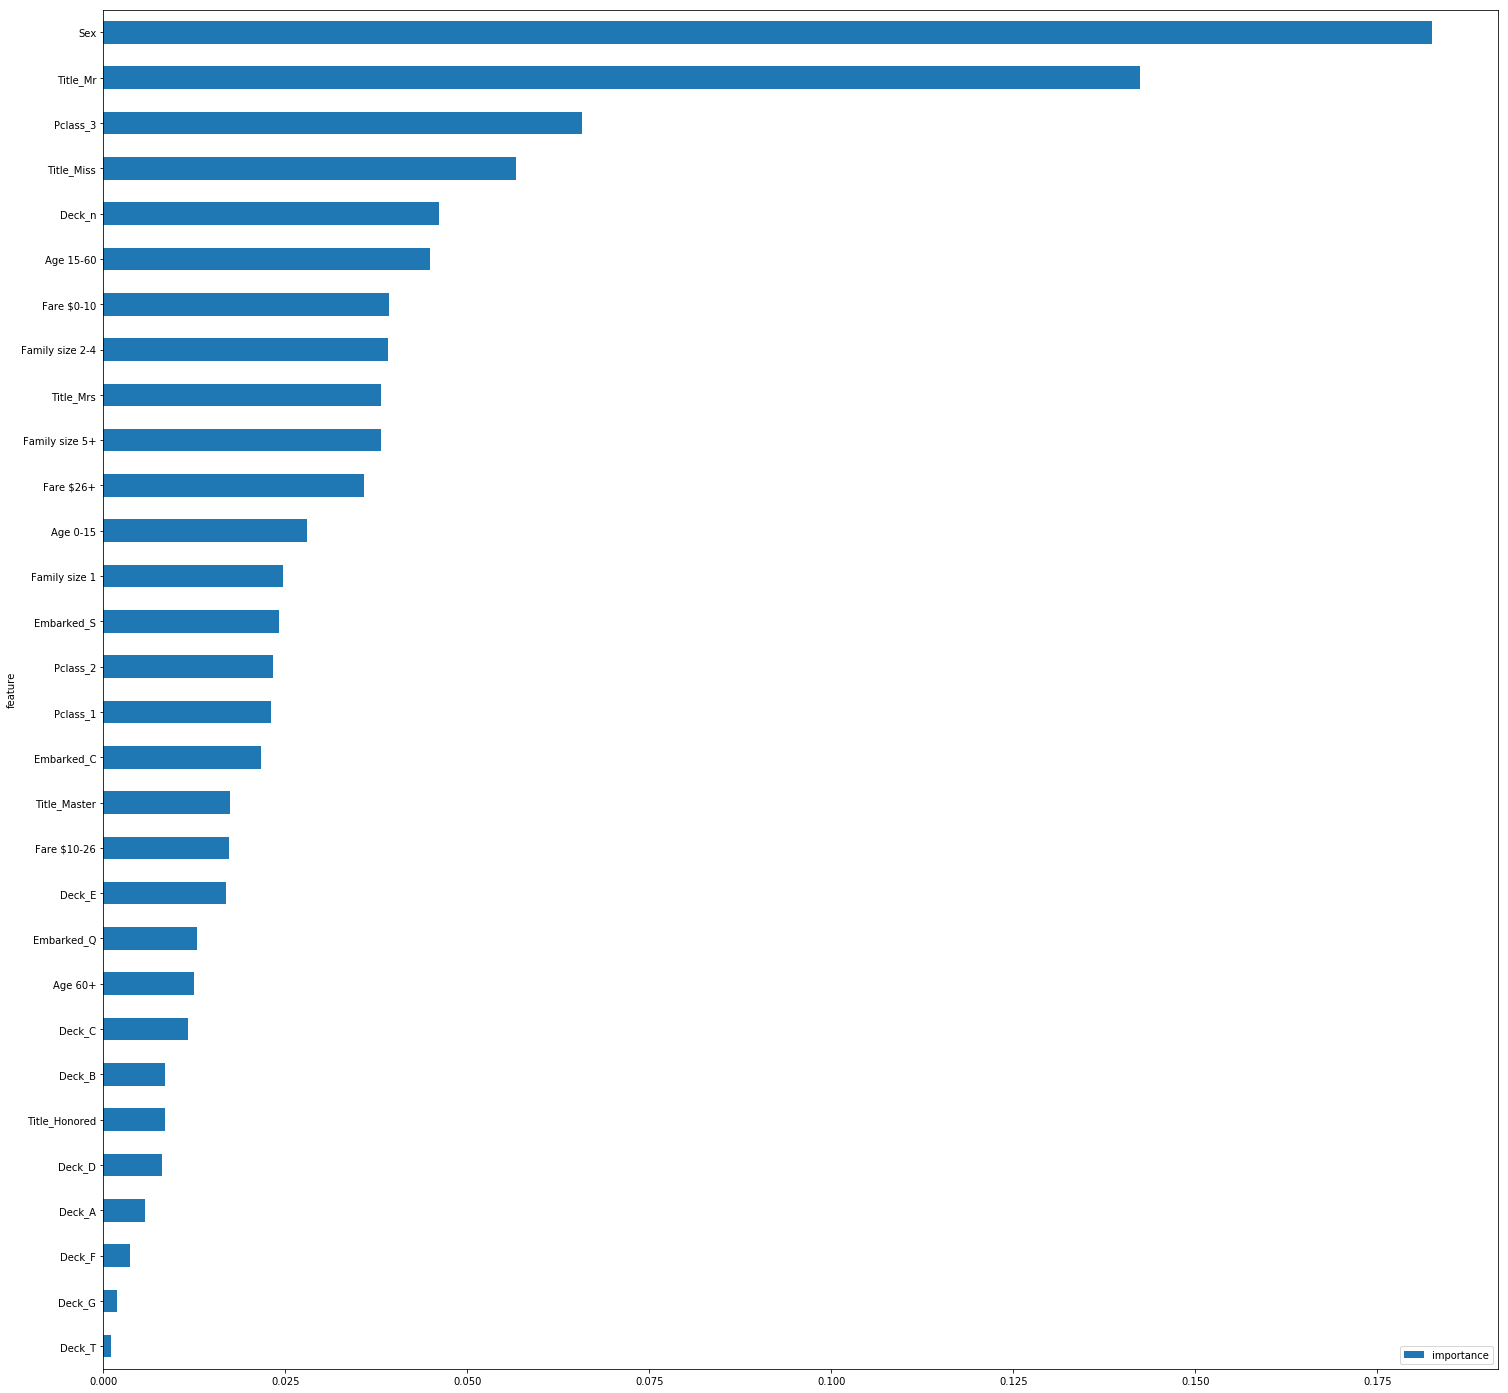

In [86]:
features.plot(kind='barh', figsize=(25, 25))

In [87]:
model = SelectFromModel(clf, prefit=True)

In [88]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

In [89]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

In [90]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('titanic_test_data_processed.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('gridsearch_rf.csv', index=False)